# **Ridge and Lasso Regression**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",500)

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0', inplace=True, axis  =1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
X = df.drop('price', axis=1)
y = df['price']

In [7]:
X1 = pd.get_dummies(X, drop_first=True)
X1

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)

## Ridge Regression model

In [10]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 50)
ridge_model.fit(X_train, y_train)

Ridge(alpha=50)

In [15]:
ridge_model.coef_

array([10153.54751317,   -53.93165793,   -27.94074693,  -586.11931201,
          17.77793099,   -68.36250492,   563.60491233,   849.53837573,
         761.95596786,   752.45822853,  -174.15096322,  -225.082071  ,
        -416.28735748,  -901.80618975, -1336.81548221, -2194.74894966,
        3499.60342543,  1935.9438775 ,  1004.5339292 ,  2831.09428072,
        2531.51050924,  3214.35683056,  3174.65365984])

In [13]:
# doing the prediction
y_ridge = ridge_model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_ridge)
print(score)

0.9119208348013104


### Choosing the Right Alpha value

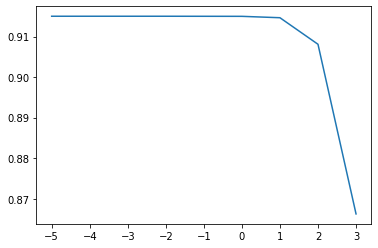

In [17]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]
log_alpha = np.log10(alpha)
score = []
for i in alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    y_ridge = ridge.predict(X_test)
    score.append(r2_score(y_test, y_ridge))

plt.plot(log_alpha, score)

So after 1 the score is falling so you can choose alpha value as 1

# Lasso Regression Model

In [19]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

In [21]:
lasso_model.coef_

array([4989.81556177,  -22.0495547 ,  -45.11959943,  940.98124407,
        128.97662998,    0.        ,   -0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.        ,  -22.99640692, -458.33220919,    0.        ,
          0.        ,    0.        ,    0.        ])

In [22]:
y_lasso = lasso_model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_lasso)
print(score)

0.84371645585432


In [26]:
X1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

Here if you see in the lasso_model.coef_ output for some features it is geeting 0 ouptput because that features are not important and internally it is applying some algorithm and dropping that features (this technique is only available in lasso regression)

#### *We can control that dropping of features by tuning the alpha value*